In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [91]:
LOWER_COLOR_DUCKIE = np.array([20, 245, 125])
UPPER_COLOR_DUCKIE = np.array([30, 255, 255])

LOWER_COLOR_DUCKIEBOT = np.array([0, 230, 60])
UPPER_COLOR_DUCKIEBOT = np.array([10, 255, 150])

TARGET_CLASS = 0

LOWER_COLOR = LOWER_COLOR_DUCKIE if TARGET_CLASS == 0 else LOWER_COLOR_DUCKIEBOT
UPPER_COLOR = UPPER_COLOR_DUCKIE if TARGET_CLASS == 0 else UPPER_COLOR_DUCKIEBOT

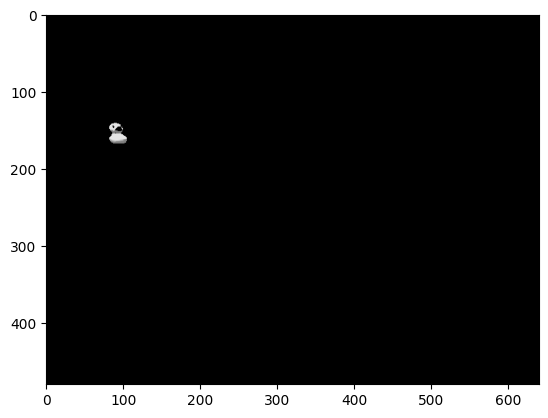

In [92]:
# Read the image
image = cv2.imread('./dataset/images/427_ETH_small_intersect.png')

# Convert the image from BGR to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Threshold the HSV image to get only yellow colors
mask = cv2.inRange(hsv, LOWER_COLOR, UPPER_COLOR)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(image, image, mask=mask)

# Convert the resulting image to grayscale
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

# Display the grayscale image with matplotlib
plt.imshow(gray, cmap='gray')

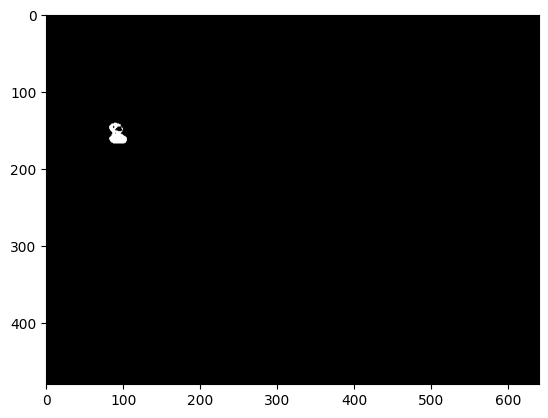

In [93]:
# Apply thresholding to get a binary image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the grayscale image with matplotlib
plt.imshow(thresh, cmap='gray')

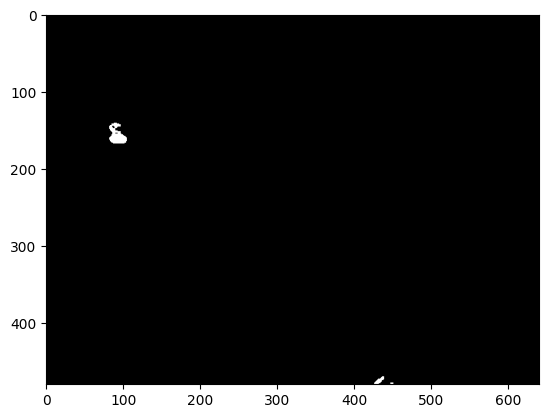

In [77]:
# Apply morphological operations to remove noise
kernel = np.ones((3, 3), np.uint8)

if TARGET_CLASS == 0:     
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=1)
elif TARGET_CLASS == 1:
    closing = cv2.dilate(thresh, kernel, iterations=2)

# Display the grayscale image with matplotlib
plt.imshow(opening, cmap='gray')

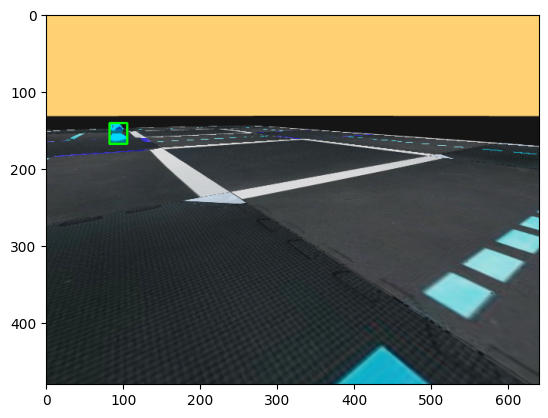

In [78]:
# Find contours of the filtered areas
contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if len(contours) > 0:
    # Choose the largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]

    # Draw the largest contour
    x, y, w, h = cv2.boundingRect(biggest_contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with matplotlib
plt.imshow(image)